<h3>Predicting sdtudent evaluation with asimple ML model </h3>

Dependencies :

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
#Import the data :
eval_data = pd.read_csv("Student_Performance.csv")
eval_data["Extracurricular Activities"]=eval_data["Extracurricular Activities"].apply(lambda x : 1 if x =="Yes" else 0)
print(eval_data.columns)
print(eval_data.head(5))
print(eval_data.dtypes)

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')
   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                           1            9   
1              4               82                           0            4   
2              8               51                           1            7   
3              5               52                           1            5   
4              7               75                           0            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
Hours Studied 

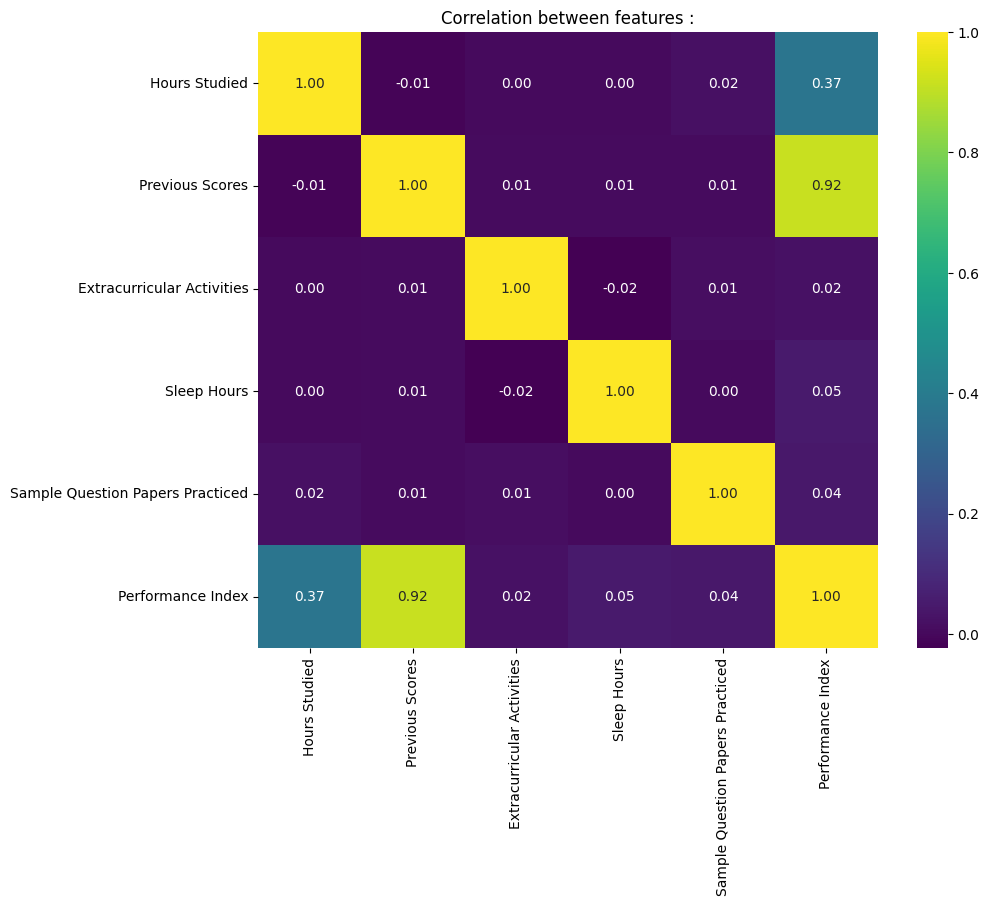

In [3]:
#Getting the correlation
correlation_matrix = eval_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis")
plt.title("Correlation between features :")
plt.show()

Plotting against the 2 significant features :

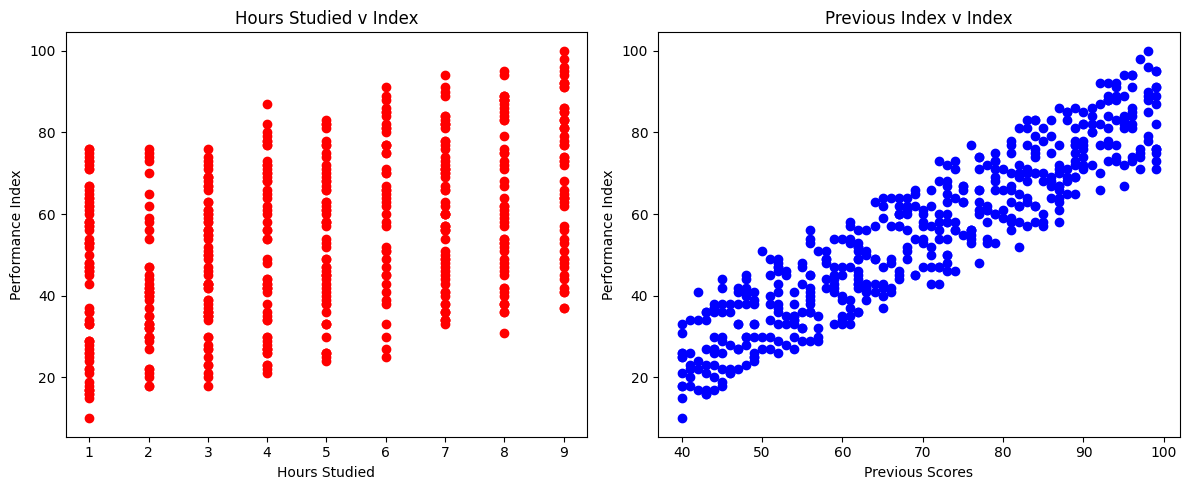

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(eval_data.head(500)["Hours Studied"], eval_data.head(500)["Performance Index"], color='red')
axes[0].set_xlabel("Hours Studied")
axes[0].set_ylabel("Performance Index")
axes[0].set_title("Hours Studied v Index")

axes[1].scatter(eval_data.head(500)["Previous Scores"], eval_data.head(500)["Performance Index"], color='blue')
axes[1].set_xlabel("Previous Scores")
axes[1].set_ylabel("Performance Index")
axes[1].set_title("Previous Index v Index")

plt.tight_layout()
plt.show()

As we can observe , for the label Performance index , most direct relationship is seen with previous scores. Besides , hours studied has an effect , but other features are not that important. Hours studied seems to have a very small positive relationship. Both features(mostly previous scores) seem to have a linear relationship

Splitting the data :

In [5]:
print(eval_data.columns)
y = eval_data["Performance Index"]
x= eval_data[["Hours Studied", "Previous Scores","Sleep Hours","Sample Question Papers Practiced","Extracurricular Activities"]].values
Xtrain , Xtest , Ytrain , Ytest = train_test_split(x , y , test_size=0.2, random_state=2)
print(Xtrain.shape , " ", Ytrain.shape)

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')
(8000, 5)   (8000,)


Training the linear Model

In [6]:
#normalizing
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)


model = LinearRegression()
model.fit(Xtrain, Ytrain)

y_pred = model.predict(Xtest)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred2 = model.predict(Xtrain)
print("Mean squared Error for Linear Regression : ", mean_squared_error(Ytest, y_pred))
print("Mean squared Error for Linear Regression : ", mean_squared_error(Ytrain, y_pred2))

Mean squared Error for Linear Regression :  4.070278591652588
Mean squared Error for Linear Regression :  4.172483094162762


Visualizing the Prediction :

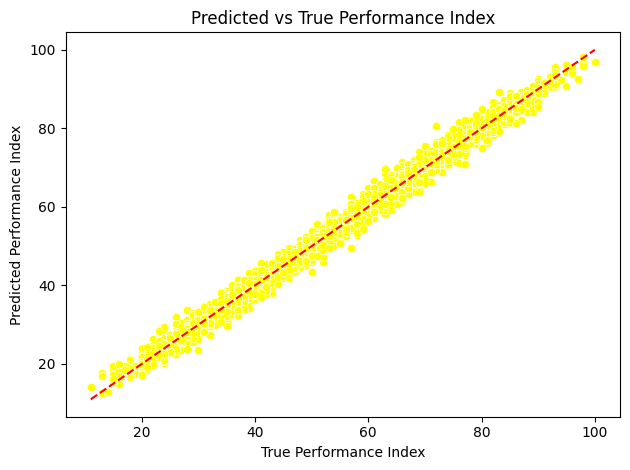

In [7]:
sns.scatterplot(x=Ytest, y=y_pred, color='yellow')
plt.xlabel("True Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Predicted vs True Performance Index")
plt.plot([Ytest.min(), Ytest.max()], [Ytest.min(), Ytest.max()], 'r--')  # Diagonal reference line
plt.tight_layout()
plt.show()

In [8]:
data = {
    "Prediction": y_pred,
    "Actual": Ytest
}
df = pd.DataFrame(data)
print(df.head(10))

      Prediction  Actual
7878   28.091417    26.0
3224   35.395579    34.0
1919   80.437955    80.0
4432   65.792531    62.0
4835   81.933145    83.0
4895   85.382310    85.0
7269   43.566663    42.0
1451   16.976982    16.0
1742   79.074557    80.0
4628   83.662933    85.0


Not important : A very basic measure of accuracy :

In [9]:
s = df["Prediction"].sum()
t = df["Actual"].sum()
error = abs(s - t)
error = error/t
error = error * 100 
print("very basic accuracy :" , (100 - error))

very basic accuracy : 99.93344581624449
